# Linear Regression - Sklearn

In [1]:
import pandas as pd

In [2]:
print(pd.__version__)


0.25.1


In [3]:
# Reading Automobile data wiht pandas library
auto_data = pd.read_csv(r"C:\KD_Doc\ML work\Lab_Home_work\Automobile_data.csv")

In [4]:
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
# In orginal data missing value is represted wiht "?" so -  
# Replacing "?" with "nan" value
import numpy as np
auto_data = auto_data.replace('?',np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Basic EDA process

In [7]:
# quick overview of data
auto_data.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,8495
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [8]:
# Examin traget variable
auto_data["price"].describe()

count      201
unique     186
top       8495
freq         2
Name: price, dtype: object

It shows target variable dtype is "object" so we have to convert in appropriate format.

In [9]:
# Converting traget column into appropriate
auto_data["price"] = auto_data["price"].astype("float")

In [10]:
auto_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [11]:
# Removing unnecessary columns
auto_data = auto_data.drop(["normalized-losses"],axis=1)

In [12]:
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


In [13]:
# Converting traget column into appropriate
auto_data["horsepower"] = auto_data["horsepower"].astype("float")
auto_data["horsepower"].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [14]:
auto_data["num-of-cylinders"].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

In [15]:
auto_data["num-of-cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [16]:
# Encoding of categorical value into numeric value
cylinders_dict = {"four" : 4,
                 "six" : 6,
                 "five" : 5,
                 "eight" : 8,
                 "two" : 2,
                 "twelve" : 12,
                 "three" : 3}
auto_data["num-of-cylinders"].replace(cylinders_dict,inplace=True)
auto_data["num-of-cylinders"].describe()

count    205.000000
mean       4.380488
std        1.080854
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max       12.000000
Name: num-of-cylinders, dtype: float64

In [17]:
print(auto_data["num-of-cylinders"].value_counts())
auto_data.head()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0


In [18]:
auto_data.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [19]:
# using one-hot encoding method to coverting categorical value into numerical value
auto_data = pd.get_dummies(auto_data,columns=["make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location",
                                             "engine-type","fuel-system"])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# shape of data before droping NA value
auto_data.shape

(205, 69)

In [21]:
# droping all the rows which has NA value
auto_data = auto_data.dropna()
print(auto_data.shape)

(195, 69)


In [22]:
# Checking is there any null value available in dataframe
auto_data.isnull().sum()

symboling           0
wheel-base          0
length              0
width               0
height              0
                   ..
fuel-system_idi     0
fuel-system_mfi     0
fuel-system_mpfi    0
fuel-system_spdi    0
fuel-system_spfi    0
Length: 69, dtype: int64

# Model building process after data cleaning process

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = auto_data.drop(["price"],axis= 1)
y = auto_data["price"]

In [25]:
# Spliting data into 80% for training and 20% testing set so we can check model accuracy.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 0)

In [26]:
# Importing linear regression library for model building
from sklearn.linear_model import LinearRegression

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Measuring how good our regression line fit is : 
lin_reg.score(X_train,y_train)

0.967922737092433

##### Regression model capture 96% of the variance in our training dataset

In [29]:
# It will shows weights for all the features in our data set
lin_reg.coef_

array([-5.80061464e+02,  3.06874682e+02, -1.06499194e+02,  1.52236727e+02,
       -5.05771408e+02,  5.30902624e+00, -4.15988710e+03,  2.82885047e+02,
       -1.75044342e+04, -4.49860407e+03, -1.59555122e+03, -4.82296063e+01,
        2.15673623e+00, -6.79852969e+01,  1.73362582e+02, -3.74284422e+03,
        3.71721668e+03,  6.86565908e+03, -4.12474818e+03, -4.48093478e+03,
       -2.94555422e+02, -4.74283895e+03,  3.47319261e+03, -4.08732786e+02,
        3.02841192e+03,  2.30284405e+03, -4.71448781e+03, -6.67651176e+02,
       -8.40276958e+03, -5.25933085e+03,  1.04713265e+04,  7.27595761e-12,
        8.36042927e+03, -4.81543507e+02, -2.06062392e+03,  6.21153583e+01,
        1.09986569e+03,  6.06615966e+03, -6.06615966e+03, -1.38232301e+03,
        1.38232301e+03,  3.37569880e+03,  3.28229109e+03,  2.99875643e+03,
       -1.00643481e+03, -1.20820627e+03, -3.92414032e+02, -3.91701310e+02,
       -4.99487338e+02, -6.59140532e+02,  1.15862787e+03, -2.46748485e+03,
        2.46748485e+03, -

In [30]:
# Checking coefficient along with features
features = X_train.columns
coef = pd.Series(lin_reg.coef_,features).sort_values()
print(coef)

bore               -17504.434184
make_peugot         -8402.769583
fuel-type_gas       -6066.159660
make_plymouth       -5259.330848
make_isuzu          -4742.838945
                        ...     
fuel-system_idi      6066.159660
fuel-type_diesel     6066.159660
make_bmw             6865.659076
make_saab            8360.429269
make_porsche        10471.326516
Length: 68, dtype: float64


In [31]:
# Using model for predication
y_pred = lin_reg.predict(X_test)

In [32]:
# Importing matplotlib for graph
import matplotlib.pyplot as plt

# Visual representation of predicted vs actul values

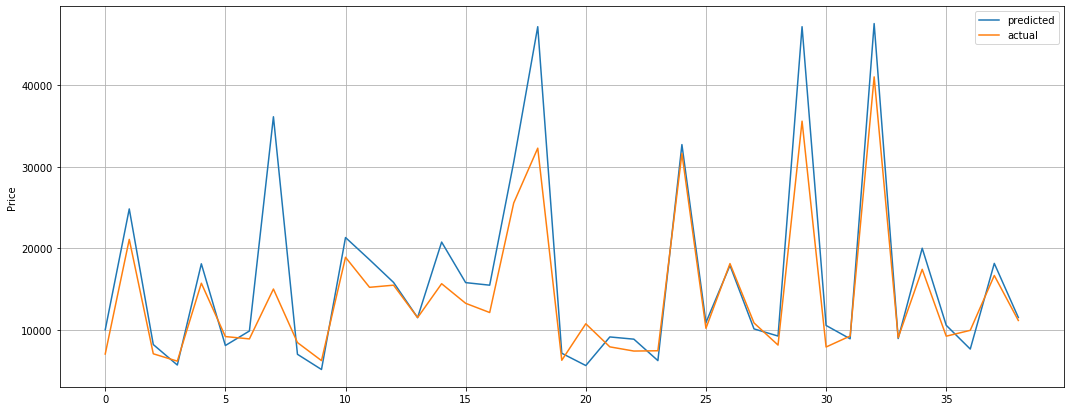

In [33]:
plt.figure(figsize=(18,7))
plt.plot(y_pred,label = "predicted")
plt.plot(y_test.values,label = "actual")
plt.ylabel("Price")
plt.grid()
plt.legend()
plt.show()

In [34]:
# Accuracy of model over test data set
lin_reg.score(X_test,y_test)

0.6322583416118159

# Performance of matrics of regression

In [35]:
# Performance of matrics of regression
# mean_squared_error = calculated over predicated lables and actual labels
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

26099937.604332738

### RMSE = Root mean square error

In [36]:
import math
math.sqrt(mean_squared_error(y_pred,y_test))

5108.809803108033

##### RMSE describes on average how much our predicted label will differ from the actual label.
The RMSE = 5108.809803108033 means on avg the price predicted by our model is around $5108 away from the actual price and it can be positive and negative direction.